In [4]:
import sys
import importlib
sys.path.append('./qdarts')

from qdarts.experiment import Experiment
from qdarts.plotting import plot_polytopes

import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import src.utilities.utils  as u
import src.utilities.model_utils  as mu
import src.utilities.plots_utils as pu

import h5py
import torch

In [2]:
path = "./datasets/sys_3_1__1/"
data, imgs, missing_folders, failed_folders = u.load_all_data(path, load_images=True)
data.keys()

  - datapoint_00035: contains ['cut_0.png']
  - datapoint_00191: contains ['cut_0.png']
  - datapoint_00195: empty folder
  - datapoint_00361: empty folder
  - datapoint_00569: empty folder
  - datapoint_00940: empty folder
  - datapoint_00985: empty folder
  - datapoint_01159: empty folder
  - datapoint_01613: empty folder
  - datapoint_01711: empty folder
  ... and 10 more
Total folders found: 5000, folders with data.npz: 4980, missing: 20
Loading 4980 datapoints from ./datasets/sys_3_1__1/.
First file: ./datasets/sys_3_1__1/datapoint_00000\data.npz, Last file: ./datasets/sys_3_1__1/datapoint_04999\data.npz
Starting to load and preprocess images...


dict_keys(['C_tilde_DD', 'C_DG', 'geometry', 'tc_meV', 'v_offset', 'x_voltage', 'y_voltage', 'alpha', 'E_c', 'cuts'])

In [3]:
imgs
context = u.create_context(data)
outputs = u.create_outputs(data) # TODO: make sure that you use E_c nor inv(C_tilde_DD)

<KeysViewHDF5 ['inputs', 'outputs', 'targets']>


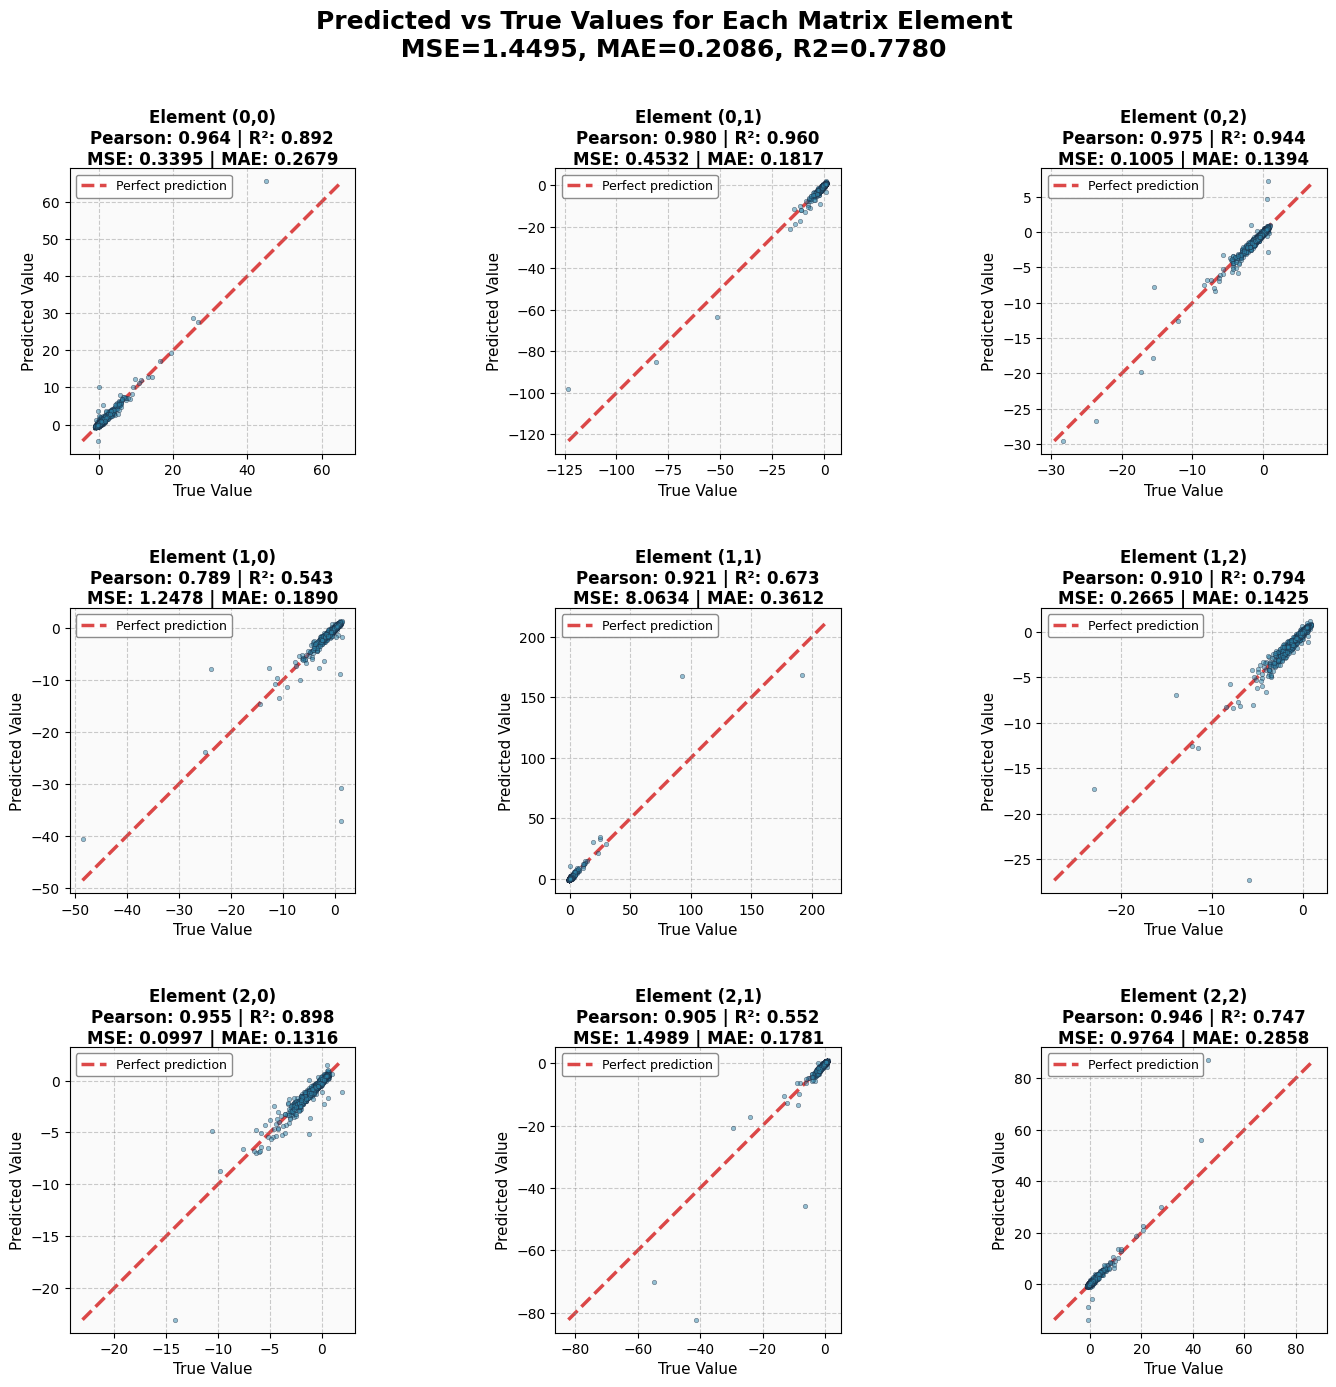

In [89]:
%matplotlib inline
model_load_path = 'results/MBArch_2026-01-23_14-16-52/'


with h5py.File(model_load_path + '/predictions.h5', 'r') as f:
    print(f.keys())
    inputs = f['inputs'][:]
    outputs = f['outputs'][:]
    targets = f['targets'][:]
    

pu.plot_prediction_vs_true_matrix_elements(targets, outputs, save_dir=None, figsize_per_subplot=(5, 5), alpha=0.5, s=10, plotname='prediction_vs_true_elementwise')

input_test = inputs[0]

In [90]:
import matplotlib.pyplot as plt
def plot_cuts_from_index(imgs, index):
    cut_01 = imgs[index].squeeze()[0]
    cut_02 = imgs[index].squeeze()[1]
    cut_12 = imgs[index].squeeze()[2]

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    cuts = [cut_01, cut_02, cut_12]
    titles = ['Cut 01', 'Cut 02', 'Cut 12']

    for i, (cut, ax, title) in enumerate(zip(cuts, axs, titles)):
        im = ax.imshow(cut, aspect='auto', cmap='viridis')
        ax.set_title(title)
        ax.axis('off')
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    plt.suptitle("Visualization of All Three Cuts", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [91]:
outliers_idx = np.where( (targets[:,0] > 20) | (targets[:,4] > 20)  | (targets[:,8] > 20) )
print(len(outliers_idx[0]), outliers_idx)

15 (array([ 169,  232,  852,  864, 1095, 1112, 1169, 1541, 1583, 1750, 1812,
       1830, 1902, 1942, 2183]),)


In [92]:
for i in outliers_idx[0]:
    print(f"index {i}:")
    print(targets[i])

index 169:
[ 25.2428      -2.4579155    0.63561904 -25.026892    -0.6486966
  -0.2732052   -1.0819032   -0.14076799  -0.2692802 ]
index 232:
[ -0.33792296 -51.348576     0.555292     1.1074888   93.11702
   0.60784674   0.48352098 -54.87452     -0.83189094]
index 852:
[ 2.6655130e+01 -3.8962200e+00  7.8631419e-01 -6.6822643e+00
  5.3944910e-01 -3.4069052e-01  1.8214552e-01 -1.2768148e+00
 -1.0245160e-02]
index 864:
[-1.9100994e-02 -6.6617661e+00  2.6043078e-01  1.3380412e+00
  2.9862196e+01 -1.3933860e+01  5.8978725e-02 -2.9550892e+01
  1.8763413e+00]
index 1095:
[-4.4755307e-01 -1.6230627e+01  8.1349030e-02  7.0704770e-01
  2.4983980e+01 -1.9910880e+00 -3.1105098e-01 -8.7360554e+00
 -1.2193942e-02]
index 1112:
[   1.1321399  -123.18255       0.7522957     1.1509157    97.93358
   -1.051956      0.27027124  -41.382313     -0.6056702 ]
index 1169:
[ -0.6840811   -1.910054    -1.8176204   -4.244807    23.355211
  -2.9404497    0.04944954 -24.183805     0.10497263]
index 1541:
[-1.0554265

index 169:


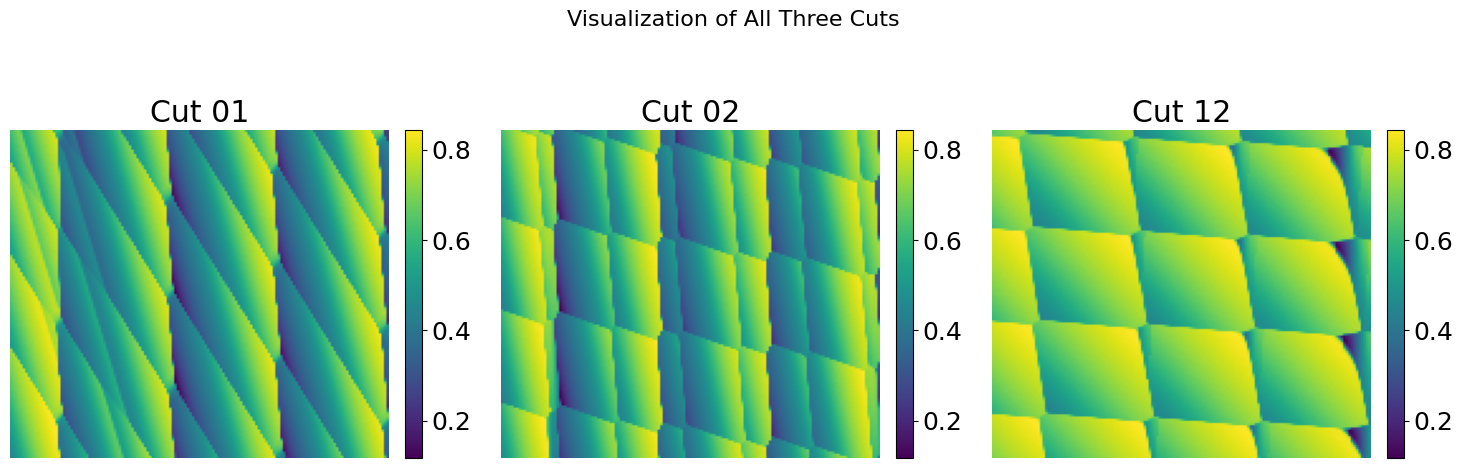

index 232:


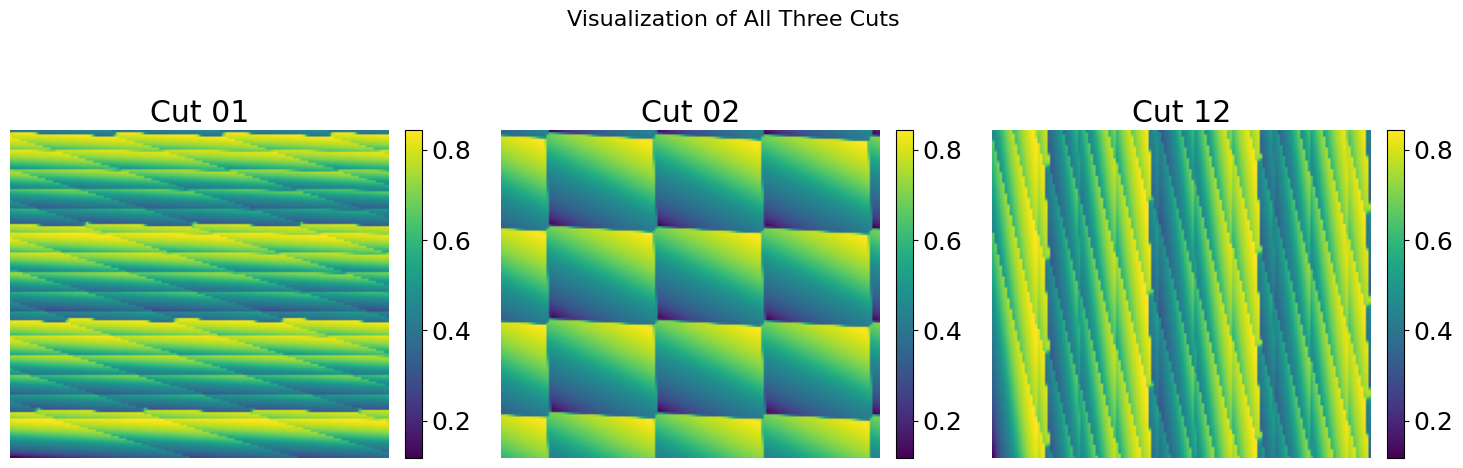

index 852:


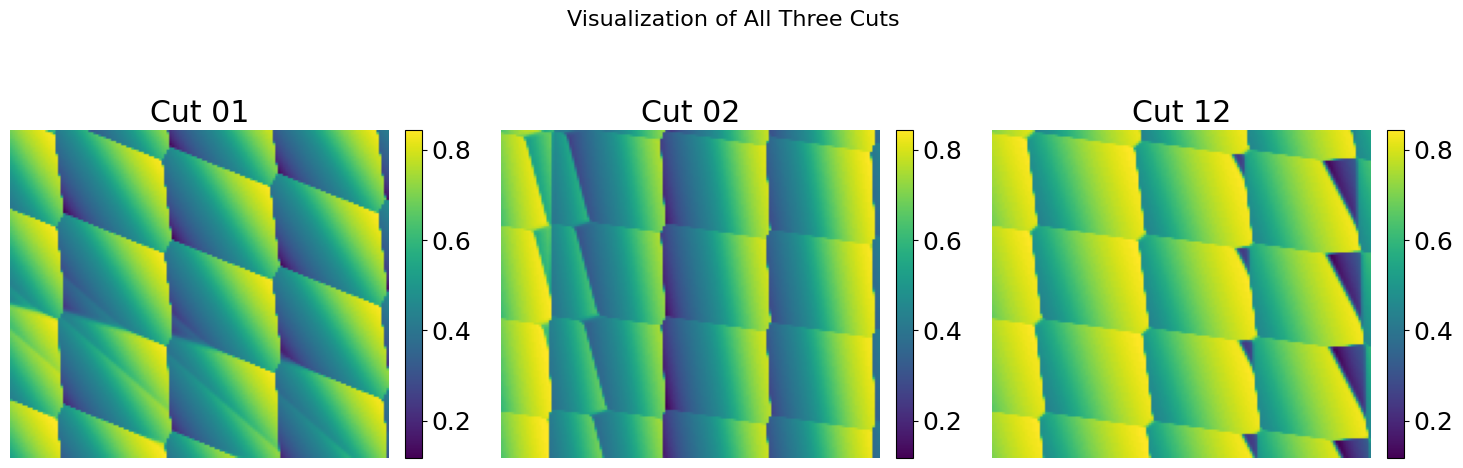

index 864:


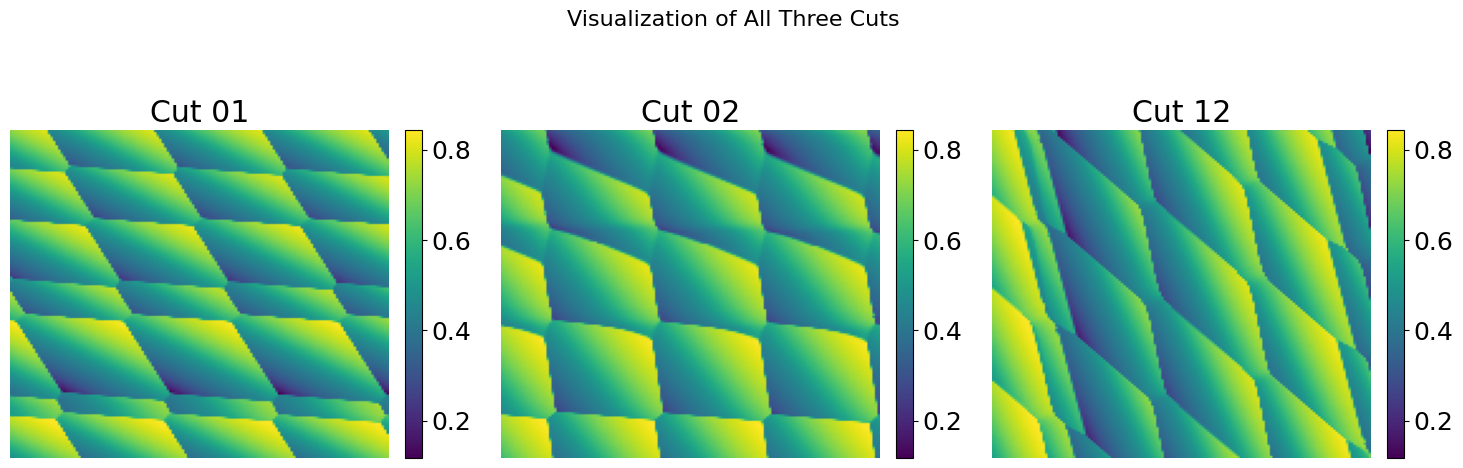

index 1095:


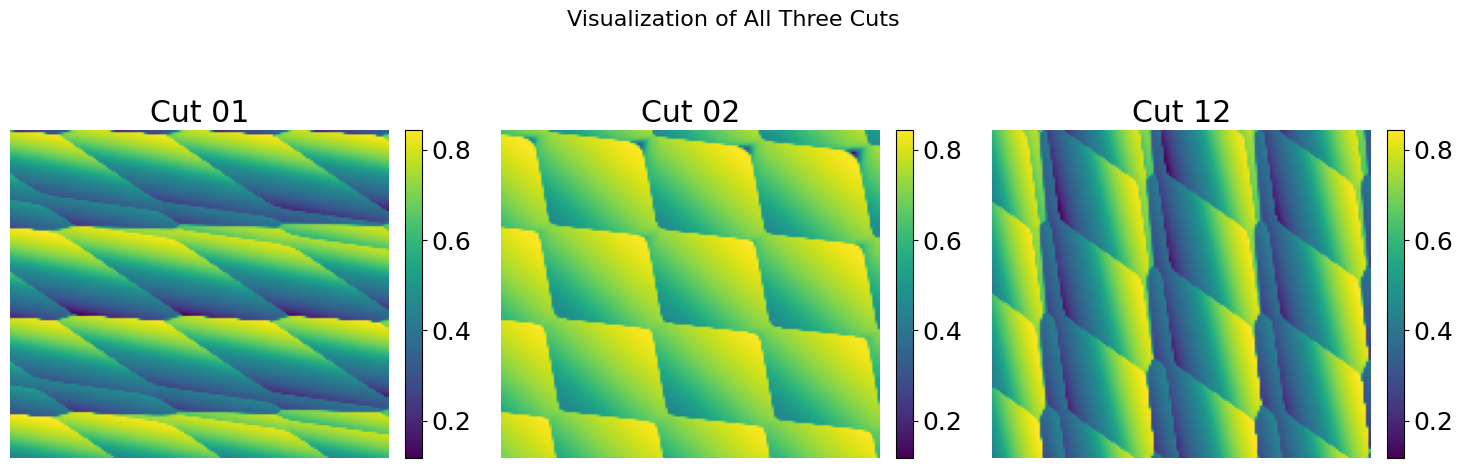

index 1112:


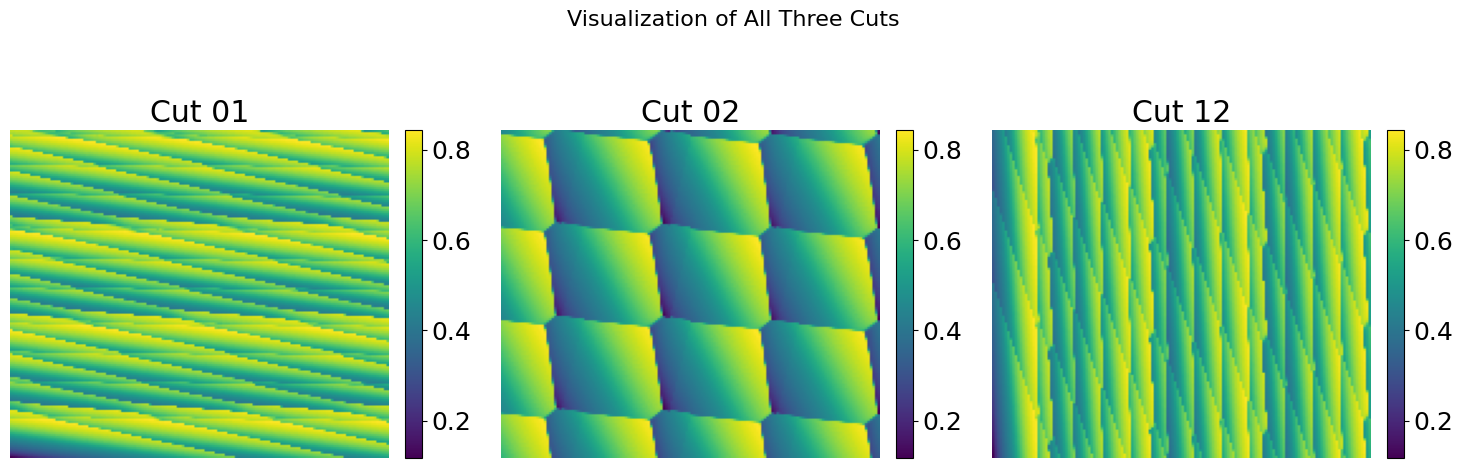

index 1169:


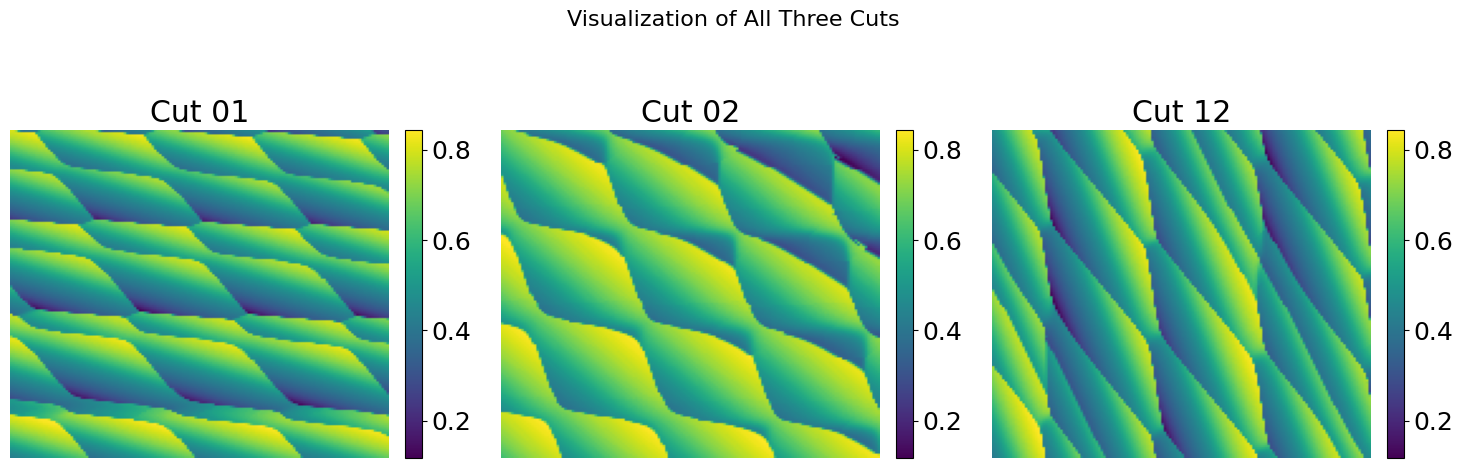

index 1541:


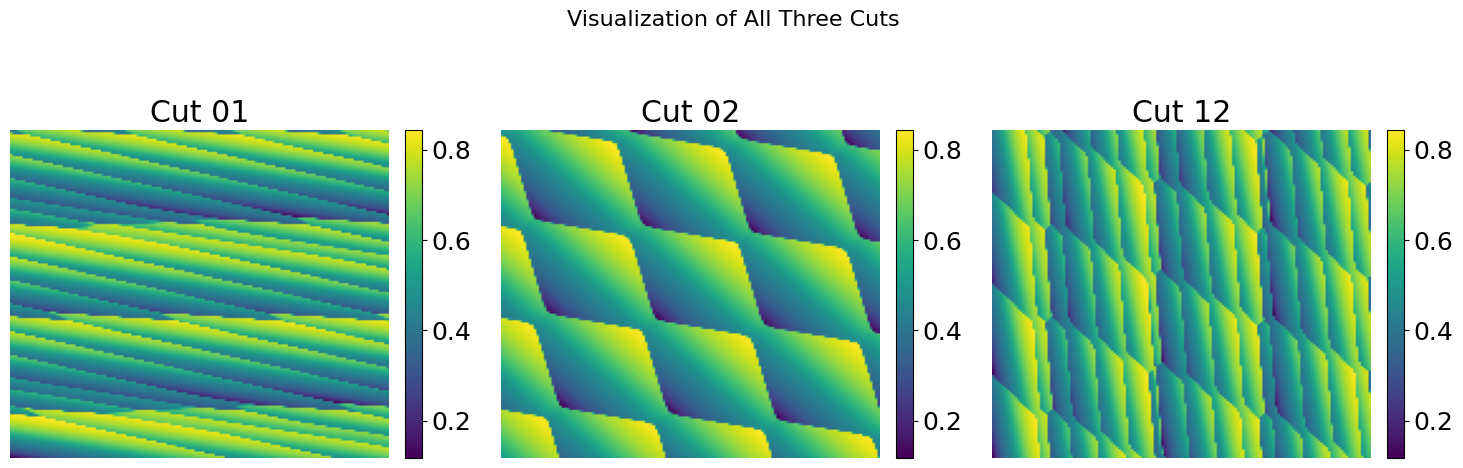

index 1583:


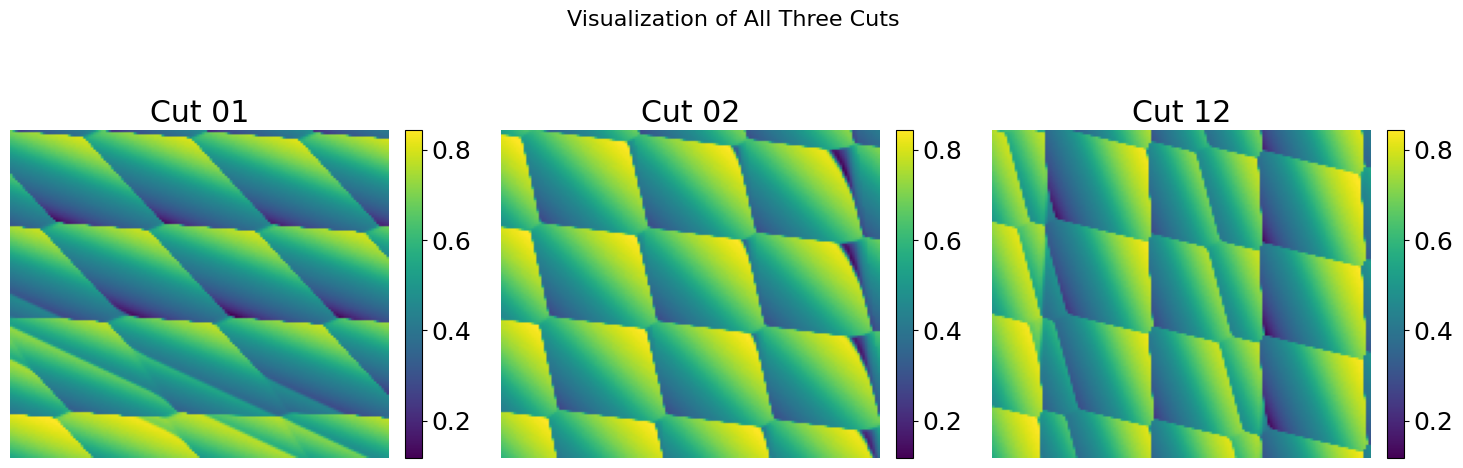

index 1750:


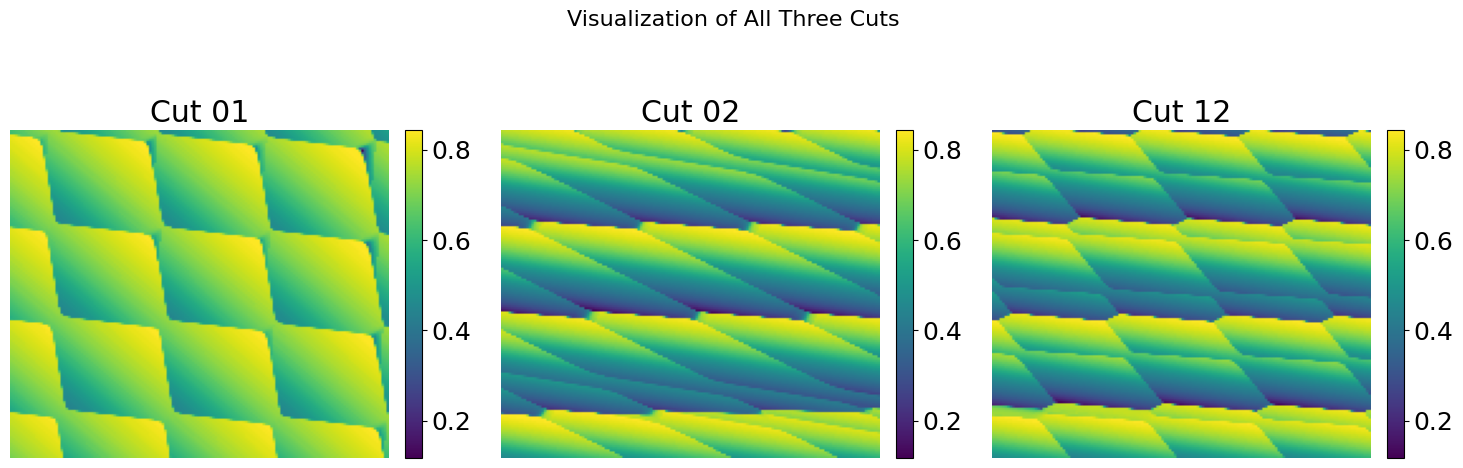

index 1812:


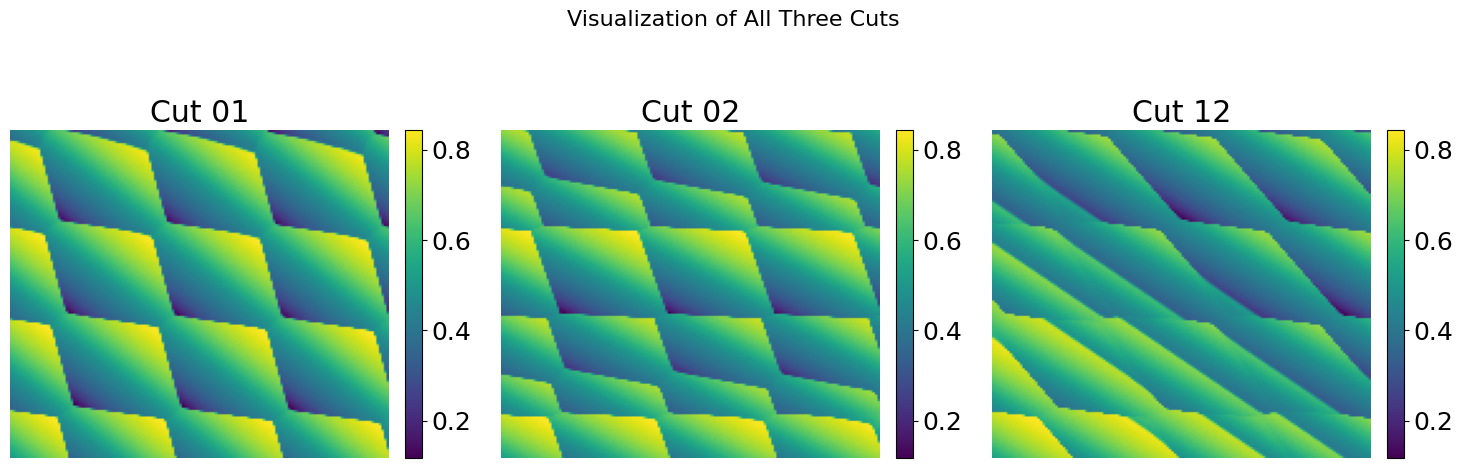

index 1830:


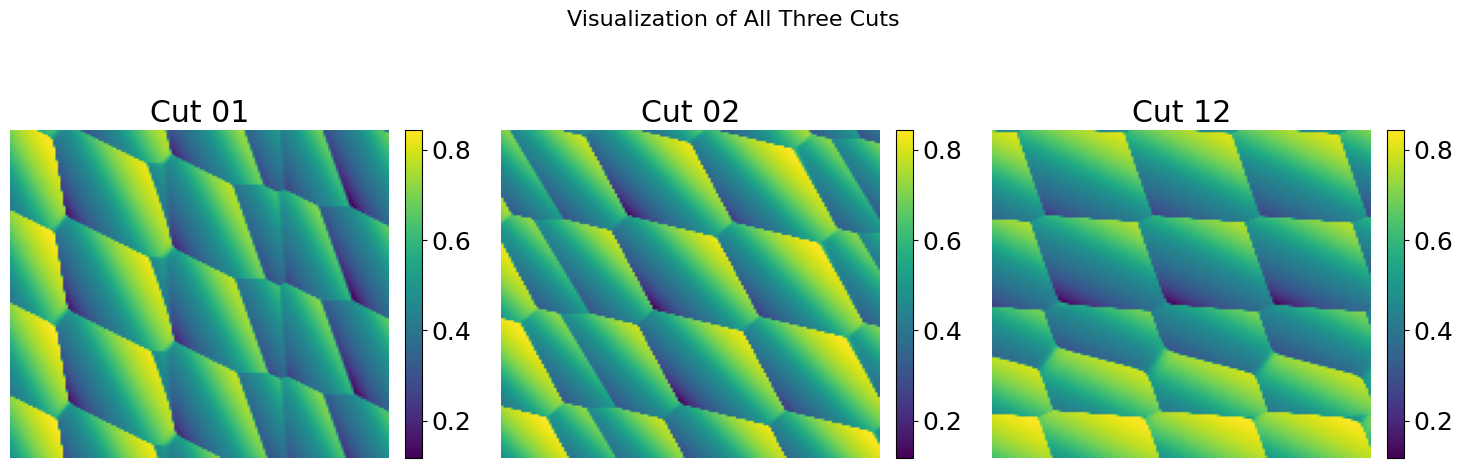

index 1902:


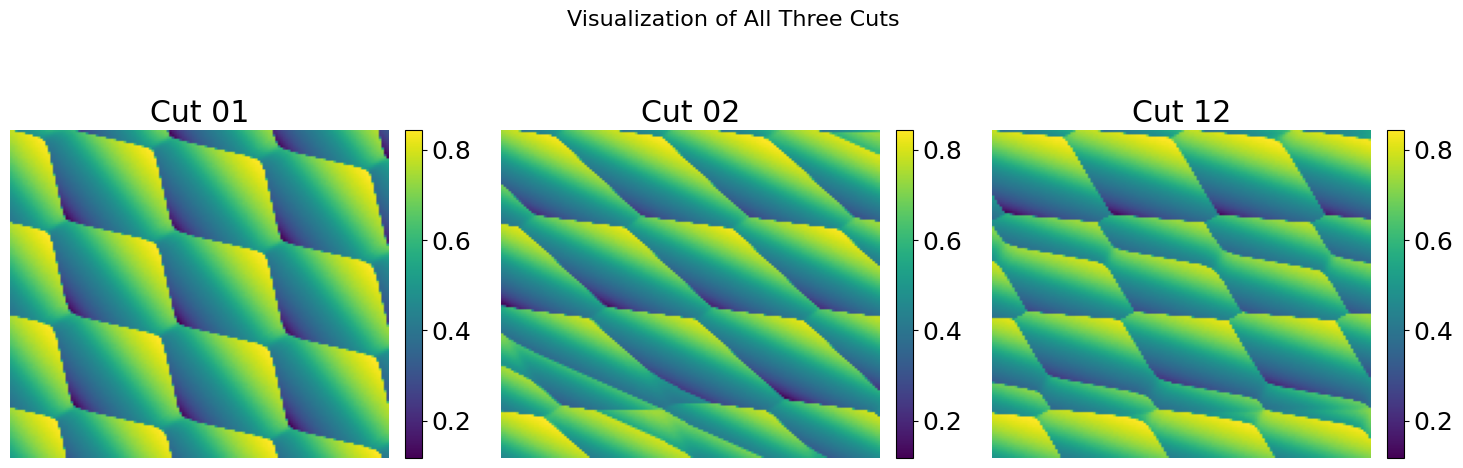

index 1942:


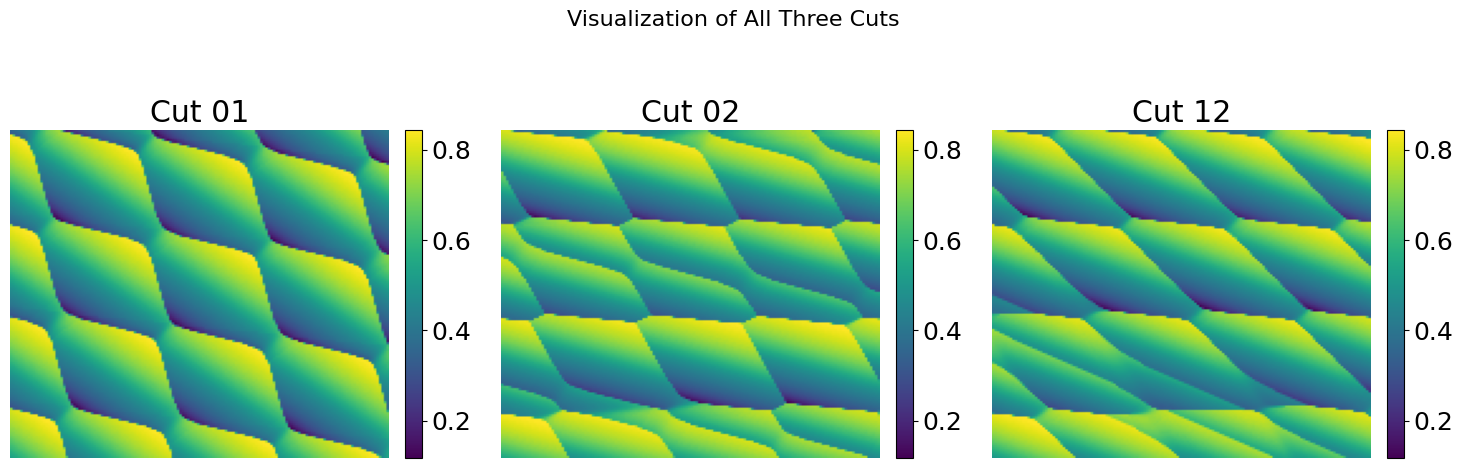

index 2183:


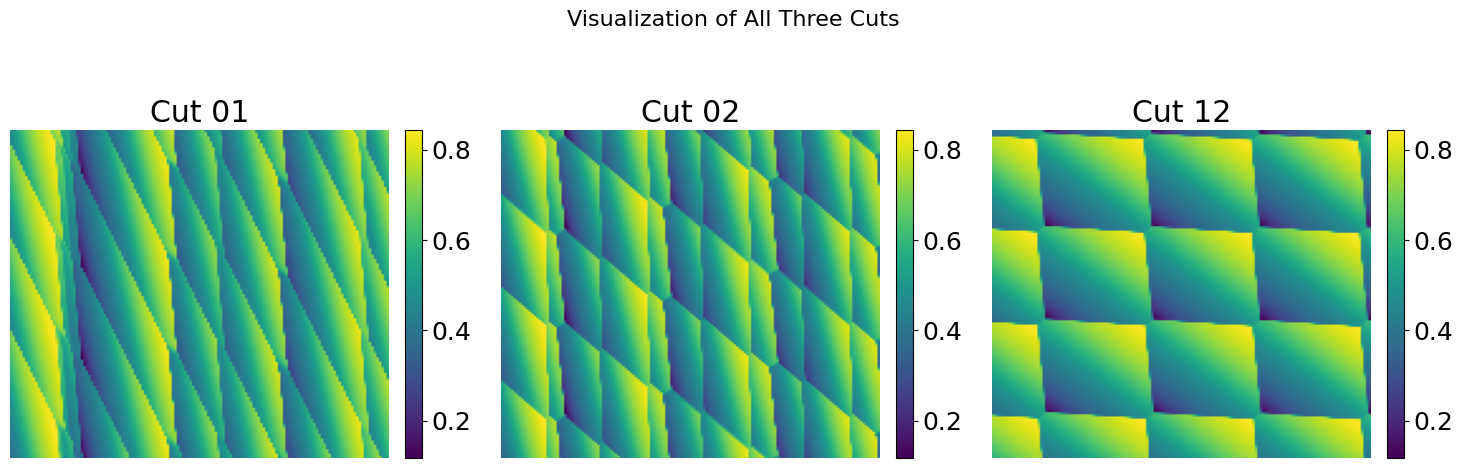

In [93]:
for i in outliers_idx[0]:
    print(f"index {i}:")
    plot_cuts_from_index(inputs, i)


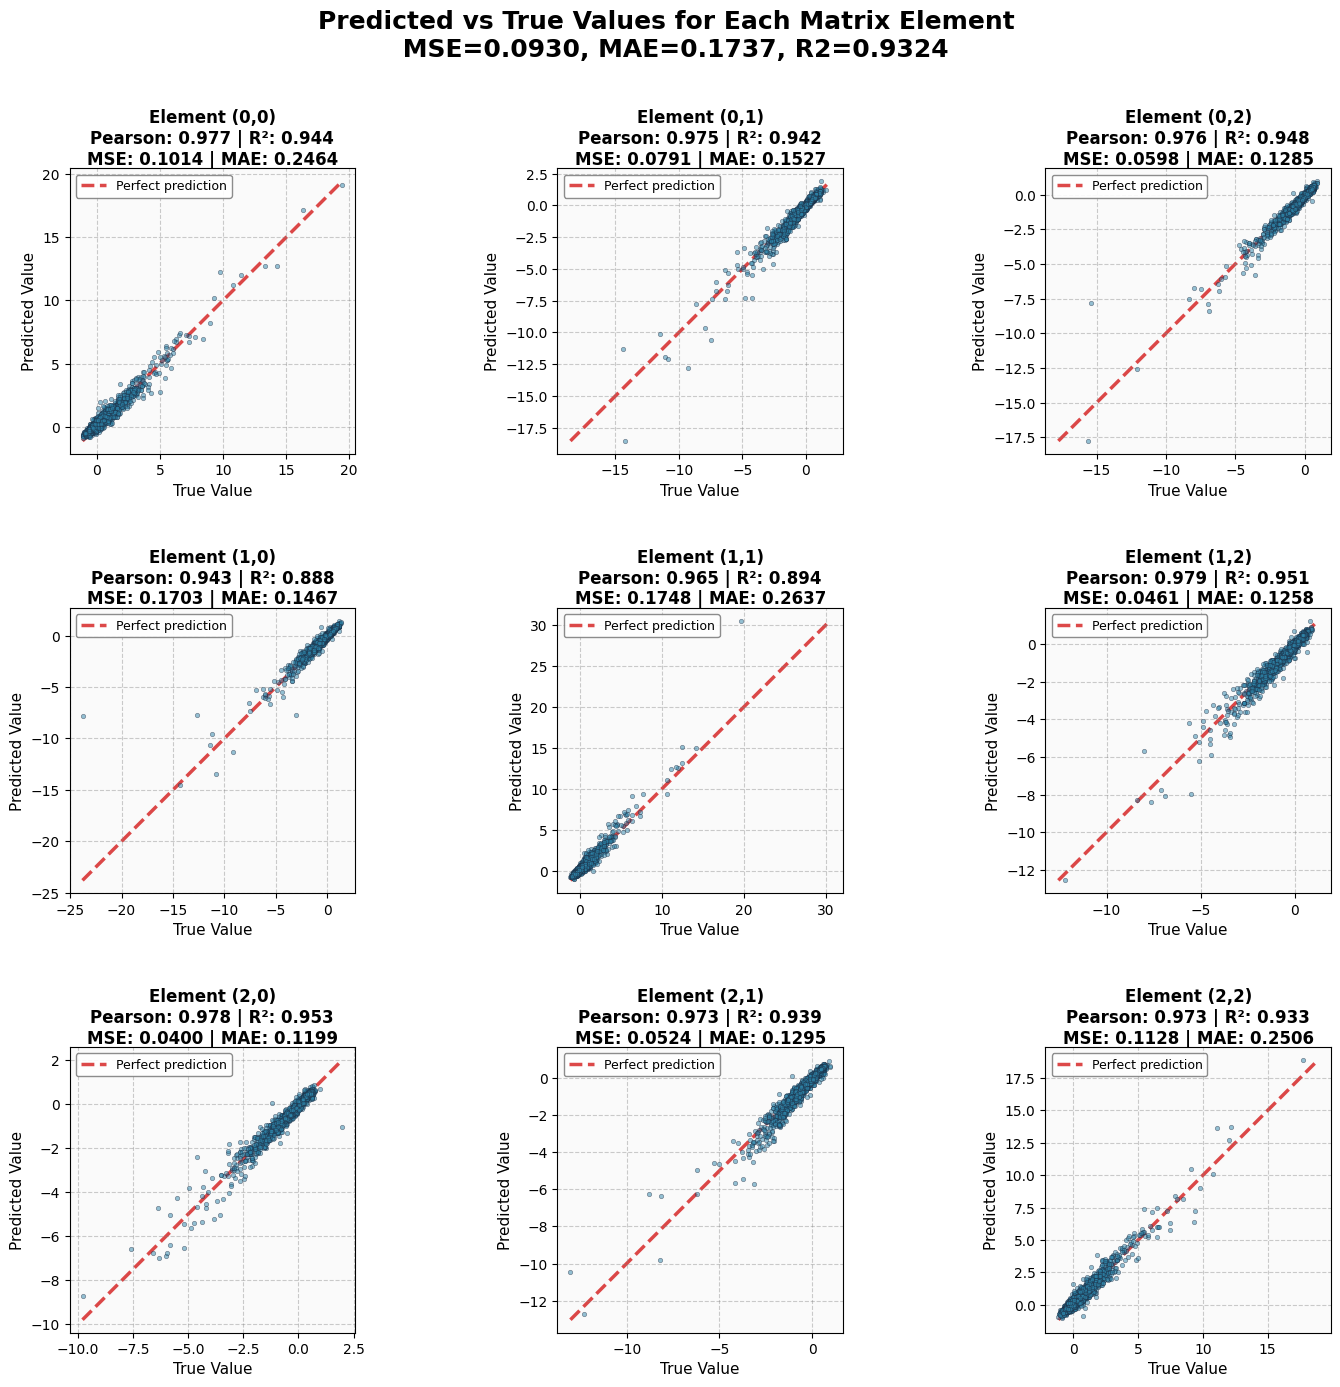

In [94]:
targets = np.delete(targets, outliers_idx, axis=0)
outputs = np.delete(outputs, outliers_idx, axis=0)
pu.plot_prediction_vs_true_matrix_elements(targets, outputs, save_dir=None, figsize_per_subplot=(5, 5), alpha=0.5, s=10, plotname='prediction_vs_true_elementwise')
